
# LOGISTIC REGRESSION - FACEBOOK AD TARGETING
### Harsh Tandon


### PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

In [2]:
df = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


### Explore/Visualize Dataset

In [5]:
print('Total: ', len(df))
print('Number of customers who clicked on Ad: ', (df.Clicked==1).sum())
print('Percentage Clicked: ', round((df.Clicked==1).sum()/len(df)*100,3),'%')
print('Number of customers who did not click: ', (df.Clicked==0).sum())
print('Percentage who did not click: ', round((df.Clicked==0).sum()/len(df)*100,3),'%')

Total:  499
Number of customers who clicked on Ad:  250
Percentage Clicked:  50.1 %
Number of customers who did not click:  249
Percentage who did not click:  49.9 %


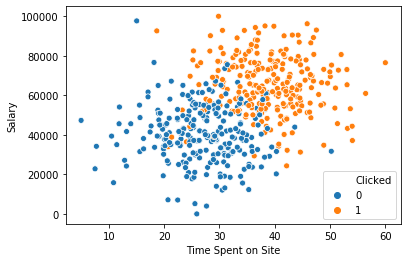

In [6]:
sns.scatterplot(x='Time Spent on Site', y='Salary', hue = 'Clicked', data = df)

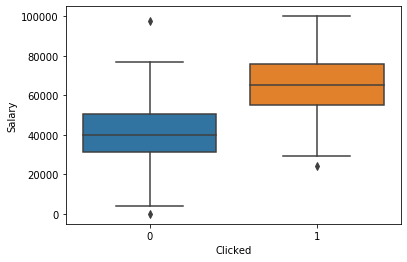

In [7]:
sns.boxplot(x='Clicked', y='Salary', data = df)

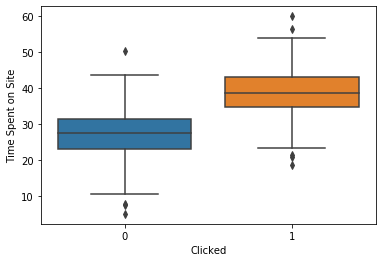

In [8]:
sns.boxplot(x='Clicked', y='Time Spent on Site', data = df)

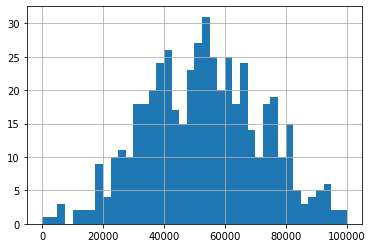

In [9]:
df.Salary.hist(bins = 40)

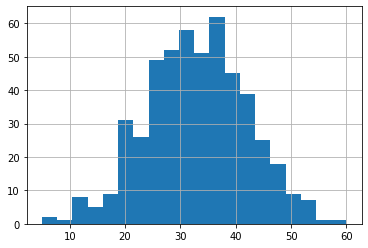

In [10]:
df['Time Spent on Site'].hist(bins = 20)

### Data Preparation and Data Cleaning 

In [11]:
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [12]:
#Let's drop the emails, country and names (we can make use of the country later!)
df.drop(columns = ['emails','Country','Names'], inplace = True)

In [13]:
df.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [14]:
#Let's drop the target coloumn before we do train test split
X = df.drop('Clicked', axis = 1)
y = df.Clicked

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Model Training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
X_train

array([[ 1.40123857e+00,  1.31693631e+00],
       [ 9.00127361e-02,  9.03336004e-01],
       [ 6.87656629e-01,  1.31802826e+00],
       [ 8.06383164e-02,  1.57436078e-01],
       [ 1.01336250e+00,  3.88173967e-01],
       [ 1.88298414e+00,  8.73179066e-01],
       [-1.08090975e+00, -6.45661787e-01],
       [ 6.68147688e-02,  4.60377823e-01],
       [ 7.99054399e-02, -1.08608789e+00],
       [ 2.24544291e-01,  3.78344206e-01],
       [ 1.55596010e+00,  1.46613769e+00],
       [-1.67886526e+00, -4.43579312e-01],
       [-1.33525938e+00, -1.43669691e+00],
       [ 1.09773526e+00,  1.34446404e+00],
       [-1.69821011e+00, -6.02685912e-01],
       [ 7.67911699e-01,  7.06197711e-01],
       [-9.02821987e-01,  8.84221540e-01],
       [ 1.12386746e+00,  5.76429012e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 1.60690195e+00,  2.11529721e+00],
       [-1.50339446e+00, -3.88461766e-01],
       [ 2.21338476e+00,  1.06200284e+00],
       [-1.10130678e+00, -9.69857225e-01],
       [ 3.

In [19]:
y_train.values

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Testing

In [21]:
y_pred_train = classifier.predict(X_train)
y_pred_train

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [22]:
y_train.values

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

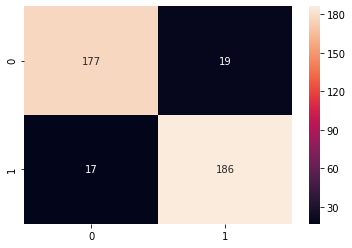

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train.values, y_pred_train)
sns.heatmap(cm, annot = True, fmt = 'd')

In [24]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

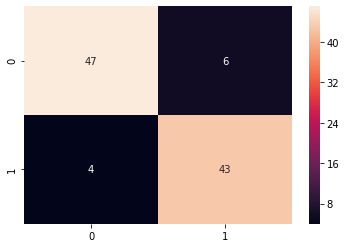

In [25]:
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True, fmt = 'd')

In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.88      0.91      0.90        47

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



### Visualizing Training and Testing Datasets

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


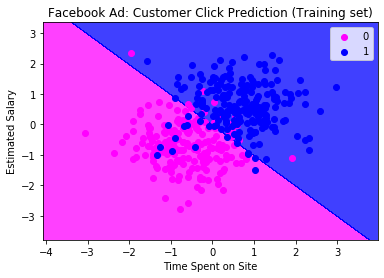

In [27]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


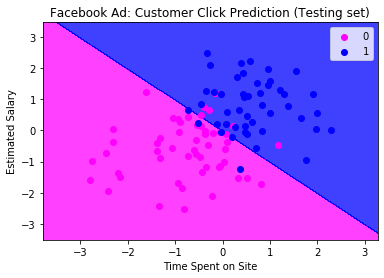

In [28]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()